In [98]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

%matplotlib inline

# Count Vectorizer

In [39]:
strings = [
    'hello, my name is John',
    'machine learning sure is fun',
    'learning text analytics is fun'
]

In [40]:
cv = CountVectorizer()

cv.fit_transform(strings)

words = cv.transform(strings)

df = pd.DataFrame(words.toarray(),columns=cv.get_feature_names())

In [41]:
df.head()

,analytics,fun,hello,is,john,learning,machine,my,name,sure,text
0,0,0,1,1,1,0,0,1,1,0,0
1,0,1,0,1,0,1,1,0,0,1,0
2,1,1,0,1,0,1,0,0,0,0,1


# TF-IDF

In [42]:
tfidf = TfidfVectorizer()

tfidf.fit_transform(strings)

words2 = tfidf.transform(strings)

df2 = pd.DataFrame(words2.toarray(),columns=tfidf.get_feature_names())

In [43]:
df2.head()

,analytics,fun,hello,is,john,learning,machine,my,name,sure,text
0,0.000000,0.000000,0.479528,0.283217,0.479528,0.000000,0.000000,0.479528,0.479528,0.000000,0.000000
1,0.000000,0.406192,0.000000,0.315444,0.000000,0.406192,0.534093,0.000000,0.000000,0.534093,0.000000
2,0.534093,0.406192,0.000000,0.315444,0.000000,0.406192,0.000000,0.000000,0.000000,0.000000,0.534093


# Document Classification with Naive Bayes

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score

In [28]:
categories = ['alt.atheism', 'soc.religion.christian',
               'comp.graphics', 'sci.med']

In [45]:
from sklearn.datasets import fetch_20newsgroups
train = fetch_20newsgroups(subset='train',categories=categories, shuffle=True, random_state=42)
test = fetch_20newsgroups(subset='test',categories=categories, shuffle=True, random_state=42)

In [48]:
from sklearn.naive_bayes import MultinomialNB

In [71]:
nb = MultinomialNB()

In [72]:
tfidf = TfidfVectorizer()

In [73]:
X = train.data
y = train.target

In [74]:
x_tr,x_te,y_tr,y_te = train_test_split(X,y,random_state=42)

In [75]:
x_tr = tfidf.fit_transform(x_tr)
x_te = tfidf.transform(x_te)

In [76]:
nb.fit(x_tr,y_tr)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [77]:
y_pr = nb.predict(x_te)
y_prb = nb.predict_proba(x_te)

In [78]:
print("Validation Accuracy: ",accuracy_score(y_te,y_pr))

Validation Accuracy:  0.9132743362831859


In [79]:
X_TEST = tfidf.transform(test.data)
y_pr_test = nb.predict(X_TEST)

In [80]:
print("Test Accuracy: ",accuracy_score(test.target,y_pr_test))

Test Accuracy:  0.8155792276964048


In [85]:
tfidf = TfidfVectorizer()
nb = MultinomialNB()

tfidf.fit(X)
nb.fit(tfidf.transform(X),y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [86]:
X_TEST = tfidf.transform(test.data)
y_pr_test = nb.predict(X_TEST)
print("Test Accuracy: ",accuracy_score(test.target,y_pr_test))

Test Accuracy:  0.8348868175765646


# Topic Modeling with LDA

In [67]:
from sklearn.decomposition import LatentDirichletAllocation

In [147]:
tfidf = TfidfVectorizer(max_df=0.8,min_df=0.2,stop_words='english')

In [148]:
X_tfidf = tfidf.fit_transform(X)

In [149]:
n_topics = [5,10,15,20,25,30]
perps = []
scores = []

for n in n_topics:
    
    lda = LatentDirichletAllocation(n_components=n)
    lda.fit_transform(X_tfidf)
    
    perplexity = lda.perplexity(X_tfidf)
    perps.append(perplexity)
    
    score = lda.score(X_tfidf)
    scores.append(score)
    
    print("Topics: ",n)
    print("Perplexity: ", perplexity)
    print("Score: ",lda.score(X_tfidf))

Topics:  5
Perplexity:  38.87395441513845
Score:  -18947.038333601016
Topics:  10
Perplexity:  58.00844713159957
Score:  -21018.936754623515
Topics:  15
Perplexity:  73.1537339857169
Score:  -22219.712908271576
Topics:  20
Perplexity:  89.4340107885772
Score:  -23259.8331460793
Topics:  25
Perplexity:  101.63563844889337
Score:  -23921.85024846273
Topics:  30
Perplexity:  121.29587871083643
Score:  -24837.224728370184


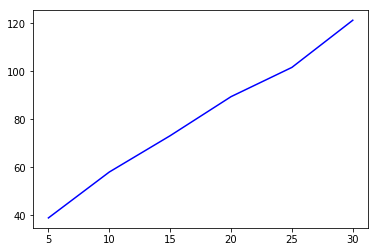

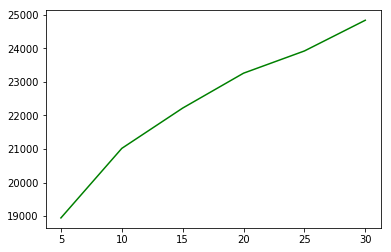

In [150]:
plt.plot(n_topics,perps,c='b')
plt.show()

plt.plot(n_topics,[-1*x for x in scores],c='g')
plt.show()

In [151]:
lda = LatentDirichletAllocation(n_components=5)

In [152]:
X_lda = lda.fit_transform(X_tfidf)

In [153]:
df_lda = pd.DataFrame(X_lda)

In [154]:
df_lda['topic'] = df_lda.idxmax(axis=1)

In [155]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [156]:
print_top_words(lda, tfidf.get_feature_names(), 20)

Topic #0: edu university article writes reply like com just way does good people think don say time know god posting host
Topic #1: god people edu say think just don does writes way time know like com university article good reply posting host
Topic #2: know edu good don time does university like just think way writes people article say reply com posting god host
Topic #3: posting host nntp edu university writes like does article know just don reply think time way say people com good
Topic #4: com writes article don people like know think time edu reply just posting does host nntp way say good university



In [160]:
df_lda.head()

,0,1,2,3,4,topic
0,0.052065,0.051807,0.480545,0.364026,0.051556,2
1,0.070191,0.068463,0.724544,0.068895,0.067906,2
2,0.065467,0.067878,0.735992,0.065037,0.065625,2
3,0.200000,0.200000,0.200000,0.200000,0.200000,0
4,0.415976,0.066887,0.067770,0.066742,0.382625,0


In [181]:
def eval_lda(n):
    print("Row No: ",n,"\n")
    print("Topic: ", df_lda.topic[n],"\n")
    print("Cateogory: ",train.target_names[train.target[n]],"\n")
    print(train.data[n])

In [182]:
import numpy as np

In [184]:
eval_lda(np.random.randint(0,df_lda.shape[0]))

Row No:  363 

Topic:  2 

Cateogory:  comp.graphics 

From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham)
Subject: Fractals? What good are they ?
Organization: Manchester Computing Centre
Lines: 5

We have been using Iterated Systems compression board to compress 
pathology images and are getting ratios of 40:1 to 70:1 without too
much loss in quality. It is taking about 4 mins per image to compress,
on a 25Mhz 486 but decompression is almost real time on a 386 in software 
alone.

